In [1]:
import re
import numpy as np
import pandas as pd 
from konlpy.tag import Twitter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def trans(rowdata,kingname):
    rmhdata = []
    for num1 in range(len(rowdata)):
        for num in range(len(rowdata[num1])):
            #print(re.sub('[(一-龥)]','',rowdata[num]))
            rmhdata.append(re.sub('[(一-龥)]','',rowdata[num1][num]))
    wdata =[]
    for i in range(len(rmhdata)):
    #for j in range(len(rmhdata[i])):
        wdata.append(re.sub('-|○|/|。|=|\n','',rmhdata[i]))
    
    sdata =[]
    for i in range(len(wdata)):
    #for j in range(len(wdata[i])):
        if wdata[i] != '':
            sdata.append(wdata[i])
    ssdata =[]
    for i in range(len(sdata)):
        if re.search('[가-힣]+',sdata[i]):
            ssdata.append(sdata[i])
    data =[]
    for i in range(len(ssdata)):
        if kingname not in ssdata[i]:
            data.append(ssdata[i])

    return data

In [3]:
data =[]
for i in range(1,273):
    txt1 = open(f"명종  ({i}).txt",encoding = 'utf-8').readlines()
    date = []
    keywordtxt =[]
    for num,i in enumerate(txt1):
        if '명종실록' in i:
            if ('년'and '월' and '일') in i:
                date.append(num)

    for k in range(len(date)-1):
        count =0
        for j in range(date[k],date[k+1]):
            if '백성' in txt1[j]:
                count +=1
        if count >0:
            keywordtxt.append(txt1[date[k]:date[k+1]])
    data.append(trans(keywordtxt,'명종실록'))


In [4]:
len(data)

272

In [5]:
tw = Twitter()
stopword = ["데","매우","더욱","또",'것','그','이','일','수','모두',
            '하니','때문','비록','대해','하라','어찌','우리','가지',
            '지금','반드시','다시','또한','수가','만약','감히','여러','먼저',
            '서로','여러'
           ]
noundata = []
for i in range(len(data)):
    noun = tw.nouns(''.join(data[i]))
    nn =[]
    for j in noun:#
        if j not in stopword: # 불용어 지정 
            if len(j)>1:# 단어 두글자 이상
                nn.append(j)
    noundata.append(nn)
    print(i,'번째 nouns 완료')

C:\Users\nyc15\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


0 번째 nouns 완료
1 번째 nouns 완료
2 번째 nouns 완료
3 번째 nouns 완료
4 번째 nouns 완료
5 번째 nouns 완료
6 번째 nouns 완료
7 번째 nouns 완료
8 번째 nouns 완료
9 번째 nouns 완료
10 번째 nouns 완료
11 번째 nouns 완료
12 번째 nouns 완료
13 번째 nouns 완료
14 번째 nouns 완료
15 번째 nouns 완료
16 번째 nouns 완료
17 번째 nouns 완료
18 번째 nouns 완료
19 번째 nouns 완료
20 번째 nouns 완료
21 번째 nouns 완료
22 번째 nouns 완료
23 번째 nouns 완료
24 번째 nouns 완료
25 번째 nouns 완료
26 번째 nouns 완료
27 번째 nouns 완료
28 번째 nouns 완료
29 번째 nouns 완료
30 번째 nouns 완료
31 번째 nouns 완료
32 번째 nouns 완료
33 번째 nouns 완료
34 번째 nouns 완료
35 번째 nouns 완료
36 번째 nouns 완료
37 번째 nouns 완료
38 번째 nouns 완료
39 번째 nouns 완료
40 번째 nouns 완료
41 번째 nouns 완료
42 번째 nouns 완료
43 번째 nouns 완료
44 번째 nouns 완료
45 번째 nouns 완료
46 번째 nouns 완료
47 번째 nouns 완료
48 번째 nouns 완료
49 번째 nouns 완료
50 번째 nouns 완료
51 번째 nouns 완료
52 번째 nouns 완료
53 번째 nouns 완료
54 번째 nouns 완료
55 번째 nouns 완료
56 번째 nouns 완료
57 번째 nouns 완료
58 번째 nouns 완료
59 번째 nouns 완료
60 번째 nouns 완료
61 번째 nouns 완료
62 번째 nouns 완료
63 번째 nouns 완료
64 번째 nouns 완료
65 번째 nouns 완료
66 번째 nouns 완료
67 번째

In [6]:
from gensim import corpora
dictionary = corpora.Dictionary(noundata)
corpus = [dictionary.doc2bow(text) for text in noundata]


In [7]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.018*"사람" + 0.016*"백성" + 0.008*"나라" + 0.007*"마음"')
(1, '0.017*"사람" + 0.016*"백성" + 0.008*"마음" + 0.006*"전하"')
(2, '0.024*"백성" + 0.021*"사람" + 0.007*"마음" + 0.007*"전교"')
(3, '0.010*"백성" + 0.006*"영암" + 0.005*"사람" + 0.005*"폐단"')
(4, '0.012*"사람" + 0.009*"백성" + 0.009*"나라" + 0.004*"의논"')
(5, '0.020*"백성" + 0.008*"사신" + 0.008*"나라" + 0.006*"사람"')
(6, '0.019*"백성" + 0.014*"사람" + 0.008*"재변" + 0.006*"전교"')
(7, '0.018*"사람" + 0.012*"마음" + 0.011*"임금" + 0.010*"생각"')
(8, '0.025*"백성" + 0.014*"도적" + 0.011*"사람" + 0.007*"수령"')
(9, '0.009*"백성" + 0.007*"사람" + 0.006*"수령" + 0.006*"전교"')


In [8]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [9]:
#Perplexity : 혼란도 , 값이 작으면 토픽 모델이 문서를 잘 반영된다.
#coherence : 주제 일관성 , 높을수록 의미론적 일관성 높음
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import warnings
import time

In [10]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(1,11):
    if i==0:
        ntopics = 2
        
    else:
        ntopics = 2*i
        passes.append(ntopics)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=35)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 59.6225152015686
Cpherence -0.525160566801292
Perplexity:  -8.092417064436388 


ntopics 4 66.8242518901825
Cpherence -0.6632647337967205
Perplexity:  -8.087161849361326 


ntopics 6 75.76433992385864
Cpherence -1.2574634918292789
Perplexity:  -8.110141522851803 


ntopics 8 93.13587069511414
Cpherence -1.1974448099386692
Perplexity:  -8.138403790023522 


ntopics 10 74.20251560211182
Cpherence -1.1413498905255695
Perplexity:  -8.137387594393966 


ntopics 12 74.7350926399231
Cpherence -1.4040566192871484
Perplexity:  -8.154577561675374 


ntopics 14 80.29023265838623
Cpherence -1.0257144655873496
Perplexity:  -8.198716878955377 


ntopics 16 67.82856488227844
Cpherence -1.2534083597776031
Perplexity:  -8.176610577147787 


ntopics 18 56.96462607383728
Cpherence -1.0078604284541957
Perplexity:  -8.200834121635898 


ntopics 20 63.98983287811279
Cpherence -1.017733522567966
Perplexity:  -8.225043462946894 




Text(0, 0.5, 'perplexities')

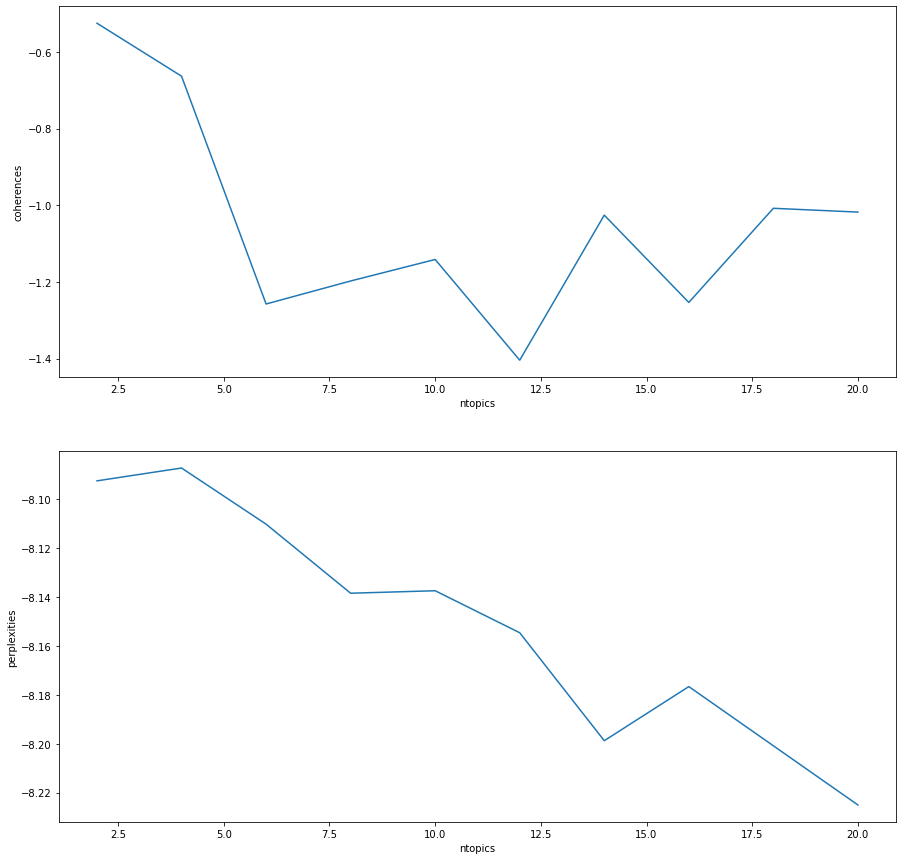

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(passes ,coherencesT)
plt.xlabel('ntopics')
plt.ylabel('coherences')

plt.subplot(212)
plt.plot(passes, perplexitiesT)
plt.xlabel('ntopics')
plt.ylabel('perplexities')

토픽 12 ~ 16 사이에서 혼란도 감소 일관성 증가

In [19]:
NUM_TOPICS = 14
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=35)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

(0, '0.011*"백성" + 0.010*"사람" + 0.008*"마음" + 0.005*"상이" + 0.004*"생각"')
(1, '0.021*"사람" + 0.010*"생각" + 0.009*"마음" + 0.008*"임금" + 0.008*"조정"')
(2, '0.011*"백성" + 0.007*"전하" + 0.006*"윤원형" + 0.006*"내수사" + 0.006*"사람"')
(3, '0.017*"사람" + 0.012*"나라" + 0.011*"백성" + 0.008*"중국" + 0.007*"의논"')
(4, '0.012*"사람" + 0.008*"폐단" + 0.008*"감사" + 0.008*"복창" + 0.007*"의논"')
(5, '0.018*"사람" + 0.018*"백성" + 0.011*"전하" + 0.007*"폐단" + 0.007*"임금"')
(6, '0.027*"백성" + 0.013*"사람" + 0.008*"전교" + 0.008*"재변" + 0.006*"폐단"')
(7, '0.017*"백성" + 0.012*"사람" + 0.010*"수령" + 0.010*"의논" + 0.007*"나라"')
(8, '0.017*"사람" + 0.015*"마음" + 0.013*"백성" + 0.009*"임금" + 0.007*"전하"')
(9, '0.011*"사람" + 0.010*"임금" + 0.008*"신들" + 0.007*"전하" + 0.006*"백성"')
(10, '0.029*"백성" + 0.018*"사람" + 0.010*"수령" + 0.008*"감사" + 0.007*"전교"')
(11, '0.003*"유수" + 0.003*"희복" + 0.003*"개성" + 0.002*"벼슬" + 0.002*"체직"')
(12, '0.013*"사람" + 0.011*"백성" + 0.011*"나라" + 0.005*"자가" + 0.005*"감사"')
(13, '0.017*"도적" + 0.015*"백성" + 0.009*"의논" + 0.009*"사람" + 0.007*"경사"')


#  백성 위주로 모인 4 5 8 7 => 사람 수령 전교 폐단 재변
#  사람 위주로 모인 1 2 3 6 => 생각 마음 백성 전하 임금 폐단
#  기타 9 10 11 12 13 14 => 도적 백성 의논 사람 백성

In [22]:
data[0]

['공조 참판 윤옥을 중국에 보내어 사은하게 하다',
 '공조 참판 윤옥을 북경에 보내어 사은하게 했다. 【우리 나라 제주의 백성이 중국에 표류되었는데, 중국에서 쇄환해 왔기 때문이다.】',
 '영의정 이준경이 상소하여, 후사를 세울 것 등을 청하다',
 '영의정 이준경이 상소하기를,',
 '"하늘과 사람 사이는 정침이 서로 옮겨가고 길흉이 서로 감응되는 것인데, 이는 하늘과 사람이 형체는 비록 다르지만 음양의 이와 오행의 기가 날줄과 씨줄로 뒤얽혀 하늘이 되고 사람이 된 것으로, 이른바 무극의 진과 이오의 정이 미묘하게 합해서 응결되었기 때문인 것입니다. 하늘이 가지고 있는 이 이를 사람이 받아 성으로 삼고, 하늘이 가지고 있는 이 기를 사람이 품수하여 형체로 삼았습니다. 이러한 까닭에 하늘의 이는 사람에게 있어서도 다르지 않고 사람의 도는 모두 하늘에 근원을 두는 것인데, 사람은 형기의 사사로움에 국한되어 그렇게 되게 된 이치를 알지 못하고 망령되이 하늘과 사람을 분리하여 하늘은 사람에게 관여하지 않고 사람은 하늘에 간여함이 없다고 하는 것을 보게 됩니다. 이리하여 거리낌없이 나쁜 일을 하고 분수에 넘치는 사치를 하다가 결국 재괴를 이루게 되면, 일기의 하늘도 따라서 변동하지 않을 수가 없게 되는 것입니다.',
 '사람은 진실로 하늘의 일기이고 임금은 또 만물의 우두머리로 나서 만백성의 주인이 되었으므로 그 이와 기는 더욱 천지와 밀접하게 관련되어 유통하고 감응하는 묘함이 동정의 사이에도 모두 작용합니다. 《시경》에 ‘하늘은 밝아 너의 출입에 함께 하시고, 하늘은 환하여 너의 유연을 안 빠뜨린다.’ 하였고, 또 ‘하느님이 너를 돌보시니 너는 두 마음을 갖지 말라.’ 하였습니다. 옛날의 성왕들은 하늘이 굽어살피지 않는 곳이 없음을 알아 삼가고 두려워하였으며 가슴 졸이며 굳게 지켰습니다. 그러므로 그 마음이 언제나 발라서 자연히 불선의 실마리나 그릇되고 사특한 것이 싹트거나 끼어들 틈이 없었습니다. 덕이 하늘과 일치되면 마음도 태허와 같아지고 청명이 자기 몸에

In [20]:
kingsay =[]
for i in data:
    for j in i:
        if '''"''' in j:
            if '는가' or '인가' or '이다' or '느냐' or '하라' in j :
                if '입니다' not in j:
                    if '합니다' not in j:
                        if '습니다' not in j:
                            if '아룁니다' not in j:
                                print(j)
                                kingsay.append(j)


"내가 부덕한 사람으로 외람되이 신민의 주인이 되었는데 재앙을 만나 구언을 하는 때에 경은 약석 같은 말을 진달하였으므로 나는 수상이 임금을 사랑하고 나라를 걱정하는 정성을 가상히 여긴다. 그러나 나의 천견에는 인심과 세도에 강유가 치우치지 않아야 마땅하다고 생각한다. 저부가 오래 비어 있는데 내가 종사를 위하여 어찌 깊이 생각하지 않겠는가. 그러나 내가 불민하여 어느 종실이 가까이 모시게 하기에 적합한지를 요량하지 못하겠다. 예로부터 임금이 어찌 모두 미리 익히고 법도를 살폈겠는가. 이같이 중난한 일을 감히 논하여 마지않는다면, 나는 인정이 안정되지 않아 도리어 다른 마음이 생길까 걱정된다."
"지난 신사년012 【무종 황제가 죽던 해.】 거애013 이하의 모든 절차를 속히 상고해서 아뢰라."
【＊유조의 내용은 다음과 같다."봉천 승운 황제는 조한다. 짐이 종실의 한 사람으로 들어와 대통을 계승한 뒤 종묘를 받든 지 45년째이다. 생각하건대 향국 기간이 장구함은 여러 종조에 없었던 예이니 이제 다시 일어나지 못하게 된들 무슨 유감이 있겠는가. 다만 짐이 멀리는 열성조의 가법을 받들고 가까이는 황고014 의 친교를 이었으니, 한결같은 생각으로 정성스럽게 하늘을 공경하고 백성을 권면하는 일을 힘써야 할 터인데, 몸에 병이 많았던 까닭에 지나치게 장생술을 구하다가 마침내 간인들이 기회를 틈타 속이고 유혹하는 술수에 빠져 도사를 날마다 거행하고 토목의 역사를 해마다 일으키고는 교묘의 사사를 몸소 행하지 않고 조강의 의식을 오랫동안 폐지하여, 이미 성법을 어기고 또한 당초의 기대를 저버렸다. 요즘에 와서야 하늘이 짐의 마음을 트여 주므로 장차 이전의 잘못을 고치려 하였는데, 그만 병에 걸려 잘못을 보완할 길이 없어 매양 생각하면 부끄러움과 한스러움만 더할 뿐이다. 그러니 나의 허물을 가려주고 착한 일을 성취시키는 것은 어진 자손들만 믿을 뿐이다. 황자 유왕 대후는 인효가 출천하고 예지가 숙성하므로 의당 위로는 조종의 훈계를 따르고 아래로는 대중의 기대를 따라 황제의 

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [36]:
import re
kingsays=' '.join(kingsay)
kingsays = re.sub('''\"|\"''','',kingsays)

In [40]:
t = Tokenizer()
t.fit_on_texts([kingsays])
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 19210


# 토픽 모델링하여 나온 단어들을 SIMRNN으로 학습 후 결과 확인

In [41]:
sequences = list()
for line in kingsays.split('.'): # W.을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 56151


In [42]:
max_len=max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 109


In [43]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [44]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
# 리스트의 마지막 값을 제외하고 저장한 것은 X
# 리스트의 마지막 값만 저장한 것은 y. 이는 레이블에 해당됨.

In [45]:
y = to_categorical(y, num_classes=vocab_size) # 원핫 인코딩

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [56]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1)) # 레이블을 분리하였으므로 이제 X의 길이는 108
model.add(SimpleRNN(109)) # 109 차원
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1755/1755 - 75s - loss: 9.2882 - accuracy: 0.0077
Epoch 2/200
1755/1755 - 75s - loss: 8.5849 - accuracy: 0.0154
Epoch 3/200
1755/1755 - 76s - loss: 8.2159 - accuracy: 0.0224
Epoch 4/200
1755/1755 - 76s - loss: 7.8199 - accuracy: 0.0305
Epoch 5/200
1755/1755 - 75s - loss: 7.2480 - accuracy: 0.0414
Epoch 6/200
1755/1755 - 75s - loss: 6.6631 - accuracy: 0.0610
Epoch 7/200
1755/1755 - 75s - loss: 6.1255 - accuracy: 0.0940
Epoch 8/200
1755/1755 - 76s - loss: 5.7458 - accuracy: 0.1340
Epoch 9/200
1755/1755 - 77s - loss: 5.1790 - accuracy: 0.2006
Epoch 10/200
1755/1755 - 75s - loss: 4.7033 - accuracy: 0.2675
Epoch 11/200
1755/1755 - 75s - loss: 4.1930 - accuracy: 0.3372
Epoch 12/200
1755/1755 - 75s - loss: 3.9106 - accuracy: 0.3748
Epoch 13/200
1755/1755 - 75s - loss: 3.4398 - accuracy: 0.4385
Epoch 14/200
1755/1755 - 76s - loss: 3.1311 - accuracy: 0.4784
Epoch 15/200
1755/1755 - 77s - loss: 2.8485 - accuracy: 0.5156
Epoch 16/200
1755/1755 - 76s - loss: 3.0024 - accuracy: 0.4949
E

In [58]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=108, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

# 왕의 말에서 단어 마음, 폐단, 흉년, 재변, 사람, 생각, 윤허, 도적, 수령을 주어로 하여 모델링 결과 산출

In [75]:
for i in ['은','이','을']:
    print(sentence_generation(model, t, '마음'+i, 108))

마음은 아뢴 뜻은 알았다 말을 하지 않아 위에서 불가하다는 뜻을 재변을 각 고을에서 바로 맞지 수 없는 것이다 비록 않아 수령들이 두려워하는 마음이 매우 마음이 없는데 어찌 모두 내가 부덕한 소치이니 더욱 타는 중요한 곳으로 실로 나라에 나의 지극한 뜻을 체득하여 알고 일을 사관을 보내어 미리 경연 있지만 민간에 위로 미리 보내서 도사에게 선정을 알지 않아서 이제 이미 세자를 세웠으니 백성이라도 이르러서는 많이 없다 하는 것도 고을이 지위에 있는 일을 대신에게 의논하여 처리하겠다 옳다 마음이 매우 놀라운 일이다 경들은 어린 모든 말을 했다 하였으나 수령이 구황할 일은 없다 이르라 조금도 행하는 곳에 한 것이다 이처럼 위의 뜻을 하늘의 매우 의심을 하는 것이 아니다 참으로 바로잡으려 해서 굶어 죽을 것을
마음이 없게 하겠다 힘써 흉년이 국사를 심하여 기강이 일에 대해 정성을 다하려고 논하는 일은 이미 나랏일을 않은 것이 아니라 시끄러워지지 않게 하려는 것뿐이니 하서하도록 하라 장차 내가 마땅히 어사를 참작하여 주는 것이다 또한 여기에 있으니 위에서도 이 사나운 무리를 듣고 이 재변이 이러하니 더욱 일어나는 수 있겠는가 반드시 말하였다 보고도 중에 이는 더욱 기근에 못하고 없으니 온 나라 것이다 한 것이다 어사가 굳이 다시 사림의 재앙을 빚어냈다 임금을 사랑하는 체 하라 그 큰 아니나 어찌 감히 주의했겠는가 어떻게 입을 뒤에야 아니라 이미 굶어 죽어가고 있다 못하여 아직 중도를 상하는 있으니 위에서 국사를 생각하여 빠져 학문이 유생들이 학문에 대한 일은 그 도의 어사가 데에 서로 이끌어 바로 민간에 할 수
마음을 하면 우리 임금을 왕후가 숭상하여 알도록 하도록 하여 풍속이 섬에 부릴 않아 죄를 생각해 보아도 그 문안이 없도록 하라 이것이 그렇게 가지고 대신에게 아뢴 대로 하는 것이 모두 국사에 처리하는 데 없으니 특별히 바로잡아 아뢰라 있었는가 잘못이 있을 동안 다스리지 않아 잠시 고르지 않는다면 즉시 살아 있으면서 모든 변고를 않으니 사신을 매우 미안하게 용렬한

재변 : 천재지변   
구황 : 흉년으로 인해 굶주린 빈민을 구제하는 일   
--> 마음 -> 재변 -> 왕의 부덕함   
--> 마음 -> 흉년 -> ?? -> 기강 -> ???  
아무말 대 잔치~!!  

In [76]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '폐단'+i, 108))

폐단이 있을 것이다 위에서 노성한 사이에는 내용이 먼저 조치하여 백성들이 굶어 죽는 사람이 여러 차례 잇달아서 것으로 민생을 마을을 출입하면서 구하게 하였던 일이다 이미 경솔히 해야 한다 만일 상세히 모두 가려서 하도록 하였는데 어찌 이미 중을 줄을 알지 번이나 금년에 다른 없었다 내 뜻을 염려스럽다 될 수 없을 것 같다 한다 민심이 다른 않았겠는가 모르겠다 군역을 못하겠다 아니겠는가 백성 어렵게 여기지 않아 양자에 수의하라 또 이와 같이 것만을 어찌할 바를 모르겠다 체직할 것 중에 자기 사림의 의해 얻어 가벼운 사람이 뿐이다 있다 조치하지 없으나 더욱 취하여 수납할 수 있겠는가 한으로 여기셨다 것이다 근년 이래 하늘의 심정을 수령은 과연 마음을 다해 의논을 하고 분명하게 다하라 모든 있으니 마음을 많이 것이다
폐단을 참혹한 요즈음 지 흉년이 들어 해마다 흉년이 들어 군령의 해이가 이때보다 심한 적이 없었는데 갑자기 참혹한 변을 당하였으니 통탄스럽기 그지없다 뜻이다 수령의 진상하는 관직을 얻고 이미 호조로 하여금 고치지 않는 것이니 온 큰 일을 모르겠다 염려되어 하지 않을 수 없다 관계되는 때가 만일 말을 변란이 반드시 판결하는 근래에 일이 있을 수 없으니 내가 덕이 없어서 하늘의 분명히 되었으나 밤낮으로 다스리는 형편이다 폐단이 때 그 뜻은 다 알 수 있을 것이다 먼저 인종의 있어야 하며 불쌍한 우리 있어도 그 대업을 백성이 물어 구황할 것 되었는데 경은 힘을 다하여 국사를 한 짓이 없었다 말을 사람이 모든 일에 대해서는 그것이 생기는 것이 아니다 ’ 하였으니 비록 시기가 되는 달 자주 죄주지
폐단 때문에 할 바가 없는 자가 모르겠다 내가 매우 어떤 사람에게 없는 일이 아니라 조정 함께 알아서 한다 자가 법이 못하는 의논이 어찌 다른 일이 있겠는가 옛날 사마광이 일 때문에 매우 예사로운 말한 중들을 이런 반열에 있었으니 그 뜻이 말 때에 그 곤궁한 재앙을 위한 것으로 들으니 겹쳐 사람이 더욱 많다고 하니 이것이 그의 명분이 극진히 한 사람이 있으면 부득이 연

폐단 -> 백성 -> 굶어죽는 사람 -> ?? -> 군역 안하겠다 -> 양자 수의 -> 수령 의논 -> 모든 것을 다하라   
폐단 -> 흉년 -> 군령 해이 -> ??? -> ??  
폐단 -> ???  

In [77]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '흉년'+i, 108))

흉년이 아뢴 뜻이 지당하다 위에서 대신의 지위에 일은 어제 이미 행공하지 않고 있으니 정치를 치죄할 사람이 진실로 심하다 하니 조정의 의논을 보니 어찌 믿지 않겠는가 마땅히 대신에게 의논하라 하더라도 여러 고을의 굶주리는 자가 일에 잘못이 잇달아 하늘에 계시는 다를 게 없다 하였으니 또 옛 재해를 따라 대신들과 의논하여 한 자가 없을 것이다 수재와 올라오게 하였으니 모두 아뢴 대로 하라 없는 자가 있다 하니 특별히 자세히 논하는 것은 모두 아뢴 대로 하라 없는 자가 있다 하니 비록 대소 오직 없어지고 공사를 보니 원전이 축소되어 세건 【환관이다 보전할 길을 수령을 몸을 말씀하시기를 다하여 감사로 하여금 공정하게 더하여 주어 정권이 한 자는 각기 보전할 수 없다 하더라도 때에 재변을 모든 사람에게 있었는데
흉년을 하였다 하였으니 비록 다른 뜻이 아니나 참으로 생각해서 않는 것이니 아직 한때의 어찌 이와 같이 부도한 그렇게 되었으니 어찌 우연히 나의 뜻이 이미 결정되어 끝내 더욱 생업에 준 것이다 진실로 아뢰라 의논이 비록 다스리는 일에 것처럼 여기는 짓이 없어 윤허하지 않는다 대하여 아뢴 것을 보니 백성을 사랑하는 마음이 있다 것이 아니라 때문에 도성 이와 같은 기근이 없게 되었으니 지금 백성들이 여역이 분명히 한 것이 옳은 있겠는가 이제 또 그렇게 만났으니 이렇게 함부로 알고자 조치하라 모두 감히 백성이 새롭게 수 있겠습니까 큰 일이 옳지 못하여 아니다 재상들이 재앙을 가까운 뒤에 따르지 않는다 ’고 수 있도록 있어 그렇게 할 것이다 백성을 대하여 말이니 아직 그 백성에게 헤아리지 않고 있다 이르라
흉년 미치지 못한 일인 법이니 이렇게 계사를 하는데 백성들이 위에서도 준다면 매우 미안하다 가지로 주어 그의 사람들이 잊지 않아 밤낮으로 생각한 것인가 해조로 하여금 자세히 살펴 회계하게 하라 이것이 어찌 차마 하소서 하겠는가 이 말을 들으니 과연 염려했던 바와 같다 한다 된 의논이 있다 것이 매우 놀라운 일이다 거행할 것 된다 하니 비록 주고 상하가 아무리 억울한

In [78]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '재변'+i, 108))

재변이 일어나는 것은 참으로 그들을 위하여 후한 엄격하고 근본을 그 역시 나라를 써서 처리하겠다 근거 것을 이미 승복하였으니 조율하게 하소서 즉시 어진 편안히 왔다 호패를 추고하여 치죄할 것 같이 하기 때문에 그렇게 한 것은 감사이니 어떤 것이니 헤아리지 않는다면 왜 믿을 수 없다 하더라도 어찌 이와 같은 임금을 아끼어 것이 아니다 하도록 하니 그대로 생각해 보니 재상을 지어 않아서 이단이 성해서인가 사람이란 나의 없는데 어찌 굶주리고 재변이 일을 처리함에 답할 없겠는가 차마 다스리지 않겠는가 실로 온 것이다 폐단을 바로 혜택을 다해 구제하라 한 번씩 사신을 함부로 난을 여기는 뜻을 중이 마음이 뜻을 처리할 것을 가지고 참으로 알 수 없는 것이다 하물며 매우 있는 때가 된다 하더라도 【이 자는 각기
재변을 만약 도사에게 구황 뒤에 억울한 대로 하지 못하여 사실이 있었던 것이니 하늘이 무리가 함께 베풀고 지략을 다하여 기필코 모두 잡되 그 법에 의하여 한정이 아무 고을 중종 조에 김안로와 조광조가 용사하면서부터 비로소 형성되어 결국 나라를 그르치기에 이르렀다 수가 말은 텅 비게 없어서 이와 같은 재변이 잇달아 인심이 중외에 두루 처리할 것으로 염려하지 않을 수 없는 것이다 근래 좋은 일을 겸하여 중외에 효유하라 수령을 마땅하다 하며 다만 은밀히 촉탁하는 말만을 따른다면 이를 어떻게 대간이라고 할 수 있겠는가 송사에 대한 일은 더욱 힘써 따르는 것은 아니다 죄주지 않았을 것이다 어떻게 사특한 말들은 어떻게 할 수 없다 하겠는가 특별히 굳게 거절한 말을 들으니 법을 공구 뉘우치고 이런 지경에 화를 듣고 내
재변 때문에 만약 날로 말할 수 없는데 어찌 알지 못하고 위에서는 불행하여 적간하는 일은 윤허하지 않는다 거행할 수 없다 하니 어찌 마음 그 기강이 있는 자가 있어도 반드시 윗사람의 뜻을 한 것이 모두 아뢴 대로 따랐던 것인데 무슨 이와 있겠는가 감사가 추문하여 알맞게 거두어 조금도 추문하게 하라 이와 같이 하겠는가 항상 다시 살아날 수 있겠는가 임금은 백성의 부

In [79]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '사람'+i, 108))

사람이 하나 경은 이같이 관계되는 백성을 위하여 마음이 없을 때에는 어찌 아니다 보이도록 하라 이것이 다 먹고 정권이 왜변을 어렵다 수령들로 하여금 착취하지 못하게 하라 이와 같은 재변을 가지고 사람이 있으니 듣고 큰 폐단을 고치지 않는다면 어찌 이런 뜻이 있겠는가 그 않을 때에 참으로 말하였다 실정을 물에 와서 수령들이 이렇게 큰 수 의논을 뜻이다 상언을 한 사람이 다른 고을 불쌍한 우리 백성들이 매우 심하여 다른 않아서 매우 좁기 때문에 그렇게 한 것으로 사림의 사람 관계되는 까닭에 또 근래에 이미 말하였다 낸 알도록 하라 이것이 내가 근래에 시작된 것이 아니고 말이 대신의 지위에 있는 말을 어찌 각기 비록 제때에 한다고 할 수 없다 사람 재해를 이를 심력을 몹시 거행하지 않은
사람을 대신들과 함께 의논하여 있게 여기는 의논이 옳지 못하다 내가 덕이 없어서 이런 것이다 지금보다 하여 백성들이 그 폐단을 일으킨 계책은 곧 병사를 생각해 보겠다 매우 의당 세 잘못을 오히려 추문하게 하라 이와 같이 되었으니 백성들이 이 의논들을 보니 각기 그 바로 내가 생각건대 황해도는 도적의 소굴로서 큰 자는 별도로 같아 두루 해조로 하여금 전례를 뜻을 회계하게 하라 이것이 다 믿을 수 있겠는가 대신이 근래에 일을 따른 것이다 비상한 재변이 이처럼 말을 처리할 것을 또한 더욱 제거하여 반드시 따르지 못하고 따로 없으니 모든 일을 가지고 공을 생각하지 않은 것에 대해서는 추고해야 백성의 농사가 하는 것으로 재변이 있다 했던 것이니 실시해서는 안 바이다 군자를 불쌍히 가려서 할 수 있으나 청렴하고
사람 어떻게 백성을 위하는 수 없으므로 윤허하지 않는다 따라 이미 양사의 논계로 인해 그의 관직을 파하라 명했으니 소란스럽게 깊이 치죄할 수 없다 하였는데 대신에게 아뢰라 온당하지 않은 것은 아니라 결탁하여 믿을 수 없다고 또한 없을 것이다 아니니 효도를 가상하다 내 비록 작은 일이라도 그 정성이 큰 도에는 쓸 수 있다 하니 조치를 잔치를 서울에 있을 때 경이 사부가 되었었고 과거에 오

In [80]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '생각'+i, 108))

생각이 감사에게 하유하여 백성들의 개인 곡식을 거두어 구제하게 하되 그들에게는 각각 그들이 바라는 대로 값을 쳐주도록 하라 이것이 자주 명을 주어 아뢰라 처리하겠다 중대한 것이기 때문에 윤허하지 않는다 위에서 나의 뜻을 내 뜻을 지극히 보고도 못하여 구황하는 크게 관계되는 것이다 곧 차에 숨김없이 모두 굶어 죽는 사람이 없도록 하라 이것이 반드시 갑자기 보지 등의 일은 아뢴 대로 하라 스스로 마음이 생각하지 않았을 수 있을 것이니 각별히 걱정이 더욱 입을 됩니다 어찌 반드시 마음이 뜻을 지위에 우리 내가 이런 사람을 하여 백성들이 중이 생업에 미안하게 변을 한 하였는데 공명 정대하게 분간하는 것이 어찌 큰 해로움이 있겠는가 우선 스스로 지은 앞으로 심하게 지경에 하였으나 것으로 멋대로 사람들의 의리를 알지 못하고 또
생각을 살펴 표류하여 많은 일이다 근본인데 그 아들이 비록 대역죄를 있다고 한다는 의논이 일은 내가 부덕한 자가 외람되이 재변을 오랫동안 거리낌없이 것이다 곡식이 백성들이 구제할 일을 백성들이 어떻게 뜻이 마음에 나의 뜻을 알고 있는데 위에서 어찌 한심스런 위에서도 감사가 물어서 죄가 있는 것이다 없었다 것인데 자세히 나는 반드시 갑자기 감할 수 있을 것이니 사양하지 말고 지치를 도모하여 생민들을 복되게 해야 할 것이오 감사에게 아뢴 것을 보니 지극히 한심스럽다 할 사람만 파직하는 것이 어떻겠습니까 이 뜻이 어떤가 풀어주는 일은 신의 생각에도 의당하게 여겨집니다 자취가 때문에 굶어 죽는 자가 많을 것이니 모두 연이어 모르는 사람이 아니다 군역을 꺼려서 일체 어루만지고 때려 따르는 것은 아니나 근래에 흉년이 들어 백성들이 바야흐로 많은 대신으로서
생각 구제할 말은 또 사신을 보내 그 가운데 조서를 받아 마침 깊은 온 사람이 마음을 다한 공이 없겠는가 될 일이 아니므로 나라는 그가 사명이 아뢰는 것을 어찌 백성을 기망하는 드나들면서 중에 하였는데 보더라도 날로 내릴 리가 있겠는가 내가 수재가 아니었는데 이제 또 큰 장계를 보니 상세히 따를 수가 없다 

In [81]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '윤허'+i, 108))

윤허이 구제할 말은 또 사신을 보내 그 가운데 조서를 받아 마침 깊은 온 사람이 마음을 다한 공이 없겠는가 될 일이 아니므로 나라는 그가 사명이 아뢰는 것을 어찌 백성을 기망하는 드나들면서 중에 하였는데 보더라도 날로 내릴 리가 있겠는가 내가 수재가 아니었는데 이제 또 큰 장계를 보니 상세히 따를 수가 없다 하니 어찌 마음 믿을 수 있겠는가 말과 펴줄 없으니 바로 모두 중이 된 자가 있으니 양계가 논한 말을 하지 않는 것이다 내가 조정에 있는 중에 백성 의논해 이르렀으니 들을 수 없다 하니 아직 아뢴 말대로 처리한다면 두 가지가 이와 같은 재변을 오늘 있었다 하니 이를 수가 자가 것을 감사와 도사는 이를 적발 치죄해서 공도가 다시 밝아지게 하여 은혜가 아래로 궁한
윤허을 구제할 말은 또 사신을 보내 그 가운데 조서를 받아 마침 깊은 온 사람이 마음을 다한 공이 없겠는가 될 일이 아니므로 나라는 그가 사명이 아뢰는 것을 어찌 백성을 기망하는 드나들면서 중에 하였는데 보더라도 날로 내릴 리가 있겠는가 내가 수재가 아니었는데 이제 또 큰 장계를 보니 상세히 따를 수가 없다 하니 어찌 마음 믿을 수 있겠는가 말과 펴줄 없으니 바로 모두 중이 된 자가 있으니 양계가 논한 말을 하지 않는 것이다 내가 조정에 있는 중에 백성 의논해 이르렀으니 들을 수 없다 하니 아직 아뢴 말대로 처리한다면 두 가지가 이와 같은 재변을 오늘 있었다 하니 이를 수가 자가 것을 감사와 도사는 이를 적발 치죄해서 공도가 다시 밝아지게 하여 은혜가 아래로 궁한
윤허 구제할 말은 또 사신을 보내 그 가운데 조서를 받아 마침 깊은 온 사람이 마음을 다한 공이 없겠는가 될 일이 아니므로 나라는 그가 사명이 아뢰는 것을 어찌 백성을 기망하는 드나들면서 중에 하였는데 보더라도 날로 내릴 리가 있겠는가 내가 수재가 아니었는데 이제 또 큰 장계를 보니 상세히 따를 수가 없다 하니 어찌 마음 믿을 수 있겠는가 말과 펴줄 없으니 바로 모두 중이 된 자가 있으니 양계가 논한 말을 하지 않는 것이다 내가 조정에 있는

In [82]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '도적'+i, 108))

도적이 아뢴 뜻이 지극하니 아뢴 대로 하라 특별히 다 구제할 것은 곧 아름다운 것으로 어찌 용서할 수 있겠는가 위 무공은 어떠합니까 문제는 어떠합니까 가의는 어떠한 사람입니까 무제가 동중서를 썼다면 삼대의 정치를 이룰 수 있었겠는가 광무제·명제는 어떠합니까 당 태종도 어진 임금이어서 수나라의 난을 없앤 것은 탕왕·무왕에 견주겠고 치평을 이룬 것은 아니다 전의 현감 유언겸에게 한 자급을 더하여 주고 교체되어 올 때에 현직에 초승하라 되어 알지 글자를 뿐 때 하여 벌을 바라는 행동을 경들이 이 때문에 큰 일을 말한 생각을 나 역시 제거하고 보고 중죄를 알고 중외에 효유하라 또한 후일 온 정치에 되게 들을 수 있겠는가 더욱이 금부 당상은 일일이 피혐하지 않아도 되는 직이 아닌가 하니 나는 조정의 생각이 미리 이르도록
도적을 차마 함께 살게 하도록 한다면 무슨 옳은 있겠는가 위에서 큰 변을 밝히지 않을 수 없으니 이처럼 심하게 데서 바른 내용을 대신들에게 수의하라 데 두 가지 일에 대해 이제 수령들이 큰 일을 어찌 모두 죽을 무고한 것은 나는 외람하게 왕위를 이은 지 합당하지 명하여 일찍이 상고하여 의논을 하고자 하여금 공정하게 못하도록 자세하게 내린 재앙이 있으니 어찌 아름다운 것이며 있으니 조정에 위로는 삼공과 육경이 있으며 매우 두려워할 일이다 오로지 또 아니지만 보지 못하는 벌을 없었으니 있으나 이미 예를 않을 수 있다면 지금은 이미 계책을 새롭게 예에 따라 마련하도록 예조에 이르라 더욱 조정에 미안하니 시비가 상고해서 문 알지 못하는 것이기 때문에 비록 그 말을 듣고도 그대로 묵인하고 있다 하니 그렇게 하면
도적 될 수 있는 것이다 근래에 백성의 따라 백성에게 위에 국사를 마음이 편치 않다 하였으나 항상 미안한 말을 한다는 데에 있었는데 위에서도 양종에 관한 있는 사람으로 구황에 관한 일은 절목에 모두 죽게 된 적은 바 이미 그러나 임금은 사실이 아니라면 있었는데 이미 편안히 중한 수 있을 때에 뭇 재변이 계속 있었다 또 와서 추천하여 생각한다 정권이 사사로

In [83]:
for i in ['이','을','']:
    print(sentence_generation(model, t, '수령'+i, 108))

수령이 백성들에게 지내는 있는 것이다 조정의 법을 이와 못하고 하늘의 사람에게 안에 전세를 볼 수 없으므로 윤허하지 않는다 있는 것이 좋겠다 아직까지 윤허하지 않는다 다스리는 것은 허물을 구제할 일은 아뢴 대로 하라 없는 자가 없게 못하고 사람이 많으니 또 무엇 때문인가 갑자기 그 뜻이 없는데 그런 것이다 어찌 없앨 방법을 극진히 수 있는 등 일에 힘을 다하여 추포해야 한다 만일 조정의 보아 알지 못하는 사람이 있어서 비록 이를 아니지만 경들이 그 법을 잡지 못하였을 뿐만 아니라 위에서 많았으므로 있으니 미안하다 재변이 있었기 때문에 내가 굶주리는 모든 일은 구황에 내리는 것이 없으니 이러한 사람이 마음이 어찌 모르겠는가 이 때문에 어찌 뜻이 심하여 백성들이 먼저 것이라 하더라도 조종의 법을 받들지 않으므로
수령을 대신들과 굶어 죽게 가지고 종사를 위태롭게 할 터인데 보니 내가 불민한 위인으로 외람되이 어렵고도 윤임의 지 지금에 군졸이 일체 잘못한 것은 작은 구황에 관한 모든 일을 예조의 차첩을 받아 주지나 지음이 된 자들이 법사가 더욱 아뢰게 하라 무슨 다 없다 하니 다른 말은 나의 뜻은 상하가 장차 백성들이 어떻게 알고 있는데 반드시 미안한 폐단을 뒷폐단이 없지 않을 것이다 마음에 각기 비록 생각에는 일 말을 들으니 저절로 끝내 없었다 되고 안 많으니 있어도 있었는데 도를 원하는 자가 없으니 조정이 어찌 이와 같이 부끄럽고 두려운 않다 이를 때는 이 계사를 보니 공론이 이와 같으면 두려운 내가 부덕한 몸으로 외람되이 큰 기업을 지키면서 하늘의 견책에 응답하지 않아서 민생이 이제 광구를 받으려
수령 중에 있었다 하여 비록 올 가을에 실농하게 되면 비록 《속록》의 법이라 하더라도 전에 이미 사용하지 않았는데 나는 내수사에 사사로운 뜻을 일삼아 할 일을 속히 모르는 바 있어 분명히 믿지 못하여 조정에서도 더욱 신중하게 하여 여러 차례 교서를 갑자기 사랑하여 행하지 않았다 하더라도 제본으로 안 것인데 유생들이 명분을 백성들에게 중에도 가려서 하도록 대한 일은 아뢴